In [35]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import h5py
import os,sys,glob, json
import _pickle as pkl
import dlab
from tqdm.notebook import tqdm
%matplotlib inline
%load_ext autoreload
%autoreload 2
plt.style.use('dark_background')


The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [36]:
import matplotlib 
matplotlib.rcParams.update({'figure.max_open_warning': 0})

### Load in raw recording data

In [37]:
recording_folder = r"G:\Grant\jason_christie\testing_0032024-01-04_15-18-13_001"
# recording_folder = r'G:/Grant/rotation/2023-09-29_16-07-39_PaBont2'

experimenter = 'grh'
experiment_description= 'Chritie Lab, University of Colorado Anschutz. Test of reaching pertibation task. checking aligmnet of neural data with video data'

# #spikeglx
# probes = [os.path.basename(f) for f in np.sort(glob.glob(recording_folder+'/*-AP*'))]

probeids = ['A'] 
probedepths = [1500] 

### Read in .txt files with event times logged as frame numbers

In [38]:
stim_path = r"G:\Grant\jason_christie\testing_0032024-01-04_15-18-13_001\session013\20240104_christielab_session013_frontCam_events.txt"


# Create dictionaries to store the data
pellet_detected_data = {}
pellet_delivery_data = {}

# Open and read the text file
with open(stim_path, 'r') as file:
    lines = file.readlines()

# Iterate through the lines and parse the data
for line in lines:
    parts = line.strip().split('\t')
    if len(parts) == 2:
        name, value = parts
        value = int(value)
        if name == 'pellet_detected':
            if name in pellet_detected_data:
                pellet_detected_data[name].append(value)
            else:
                pellet_detected_data[name] = [value]
        elif name == 'pellet_delivery':
            if name in pellet_delivery_data:
                pellet_delivery_data[name].append(value)
            else:
                pellet_delivery_data[name] = [value]

pellet_detected_frame = pellet_detected_data['pellet_detected']
print("Pellet Detected Values:", pellet_detected_frame)
pellet_delivery_frame = pellet_delivery_data['pellet_delivery']
print("Pellet Delivery Values:", pellet_delivery_frame)


# Divide each value by 150
pellet_detected_seconds = [value / 150 for value in pellet_detected_frame]
pellet_delivery_seconds = [value / 150 for value in pellet_delivery_frame]

print(pellet_delivery_seconds)
print(pellet_detected_seconds)


Pellet Detected Values: [2661, 7840, 13007, 15920, 21074, 26250, 31436, 36620]
Pellet Delivery Values: [2720, 7879, 13044, 15941, 21113, 26334, 31488, 36657]
[18.133333333333333, 52.526666666666664, 86.96, 106.27333333333333, 140.75333333333333, 175.56, 209.92, 244.38]
[17.74, 52.266666666666666, 86.71333333333334, 106.13333333333334, 140.49333333333334, 175.0, 209.57333333333332, 244.13333333333333]


### load in .txt file containing each frame number. stored as time between frame in nano-seconds

In [39]:
frame_path = r"G:\Grant\jason_christie\testing_0032024-01-04_15-18-13_001\session013\20240104_christielab_session013_sideCam_timestamps.txt"
# Initialize an empty list to store the numbers
frames = []

# Open and read the text file
with open(frame_path, 'r') as file:
    for line in file:
        number = int(line.strip())
        frames.append(number)

# Now, 'numbers' is a list containing all the numbers from the text file
# print("Numbers Array:", frames)
print("total frames: ", len(frames))

# frame_numbers = [index + 1 for index in range(len(frames))]
frame_numbers = [(index + 1) / 150 for index in range(len(frames))]


# print('frame numbers: ', frame_numbers)
print(len(frame_numbers)/150)





total frames:  37027
246.84666666666666


### Plot the time between each frame, to see drop frames

total frame timestamps: 37027
recording duration seconds: 246.84666666666666


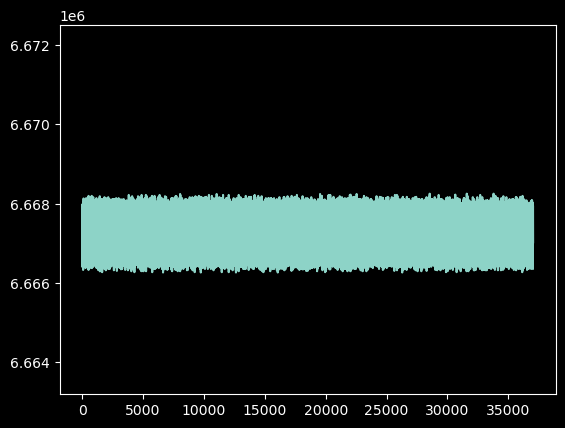

In [9]:
total_frame_timestamps = len(frames)
print("total frame timestamps:", total_frame_timestamps)
print("recording duration seconds:", total_frame_timestamps/150)
plt.ylim(6663200, 6672500)
plt.plot((frames))


### Load in the events data, logged in the digial lines of the openephys aquisition. and stored in the events folder of your recording

In [11]:
from open_ephys.analysis import Session

directory = recording_folder # for example

session = Session(recording_folder)

In [12]:
events_df = pd.DataFrame(session.recordnodes[0].recordings[0].events)#

In [13]:
events_df

,line,sample_number,timestamp,processor_id,stream_index,stream_name,state
0,1,2700983,91.507541,108,0,ProbeA-AP,0
1,1,225081,91.507544,108,1,ProbeA-LFP,0
2,7,2747832,91.507567,109,2,PXIe-6341,0
3,7,2762833,92.007600,109,2,PXIe-6341,1
4,1,2715983,92.007611,108,0,ProbeA-AP,1
...,...,...,...,...,...,...,...
37138,8,9948228,331.520767,109,2,PXIe-6341,1
37139,7,9948426,331.527367,109,2,PXIe-6341,0
37140,8,9948427,331.527400,109,2,PXIe-6341,0
37141,8,9948628,331.534100,109,2,PXIe-6341,1


In [14]:
session.recordnodes[0].recordings[0].events

,line,sample_number,timestamp,processor_id,stream_index,stream_name,state
0,1,2700983,91.507541,108,0,ProbeA-AP,0
1,1,225081,91.507544,108,1,ProbeA-LFP,0
2,7,2747832,91.507567,109,2,PXIe-6341,0
3,7,2762833,92.007600,109,2,PXIe-6341,1
4,1,2715983,92.007611,108,0,ProbeA-AP,1
...,...,...,...,...,...,...,...
37138,8,9948228,331.520767,109,2,PXIe-6341,1
37139,7,9948426,331.527367,109,2,PXIe-6341,0
37140,8,9948427,331.527400,109,2,PXIe-6341,0
37141,8,9948628,331.534100,109,2,PXIe-6341,1


### Verify all event types are being recorded

In [18]:
probeA_LFP = events_df[events_df.stream_name == 'ProbeA-LFP' ]
probeA_LFP

,line,sample_number,timestamp,processor_id,stream_index,stream_name,state
1,1,225081,91.507544,108,1,ProbeA-LFP,0
5,1,226331,92.007612,108,1,ProbeA-LFP,1
7,1,227581,92.507635,108,1,ProbeA-LFP,0
11,1,228831,93.007677,108,1,ProbeA-LFP,1
15,1,230081,93.507709,108,1,ProbeA-LFP,0
...,...,...,...,...,...,...,...
36751,1,818832,329.027170,108,1,ProbeA-LFP,1
36829,1,820082,329.527210,108,1,ProbeA-LFP,0
36908,1,821332,330.027251,108,1,ProbeA-LFP,1
36986,1,822582,330.527292,108,1,ProbeA-LFP,0


In [19]:
probeA_AP = events_df[events_df.stream_name == 'ProbeA-AP' ]
probeA_AP

,line,sample_number,timestamp,processor_id,stream_index,stream_name,state
0,1,2700983,91.507541,108,0,ProbeA-AP,0
4,1,2715983,92.007611,108,0,ProbeA-AP,1
8,1,2730983,92.507640,108,0,ProbeA-AP,0
10,1,2745983,93.007675,108,0,ProbeA-AP,1
16,1,2760983,93.507710,108,0,ProbeA-AP,0
...,...,...,...,...,...,...,...
36752,1,9825993,329.027180,108,0,ProbeA-AP,1
36830,1,9840993,329.527221,108,0,ProbeA-AP,0
36907,1,9855993,330.027240,108,0,ProbeA-AP,1
36985,1,9870993,330.527281,108,0,ProbeA-AP,0


In [22]:
ni_df = events_df[events_df.stream_name == 'PXIe-6341' ]
ni_df

,line,sample_number,timestamp,processor_id,stream_index,stream_name,state
2,7,2747832,91.507567,109,2,PXIe-6341,0
3,7,2762833,92.007600,109,2,PXIe-6341,1
6,7,2777834,92.507633,109,2,PXIe-6341,0
9,7,2792835,93.007673,109,2,PXIe-6341,1
12,8,2807376,93.492367,109,2,PXIe-6341,1
...,...,...,...,...,...,...,...
37138,8,9948228,331.520767,109,2,PXIe-6341,1
37139,7,9948426,331.527367,109,2,PXIe-6341,0
37140,8,9948427,331.527400,109,2,PXIe-6341,0
37141,8,9948628,331.534100,109,2,PXIe-6341,1


### Sync pulse is recorded on digital line 7, every half second

In [23]:
ni_df[ni_df['line'] == 7]


,line,sample_number,timestamp,processor_id,stream_index,stream_name,state
2,7,2747832,91.507567,109,2,PXIe-6341,0
3,7,2762833,92.007600,109,2,PXIe-6341,1
6,7,2777834,92.507633,109,2,PXIe-6341,0
9,7,2792835,93.007673,109,2,PXIe-6341,1
17,7,2807837,93.507733,109,2,PXIe-6341,0
...,...,...,...,...,...,...,...
36828,7,9888421,329.527200,109,2,PXIe-6341,0
36906,7,9903422,330.027233,109,2,PXIe-6341,1
36984,7,9918423,330.527245,109,2,PXIe-6341,0
37061,7,9933425,331.027312,109,2,PXIe-6341,1


### SideCam Frame numbers are recorded in the events folder on digital line 8


In [24]:
frame_events = ni_df[ni_df['line'] == 8]
frame_events


,line,sample_number,timestamp,processor_id,stream_index,stream_name,state
12,8,2807376,93.492367,109,2,PXIe-6341,1
13,8,2807574,93.498967,109,2,PXIe-6341,0
14,8,2807776,93.505700,109,2,PXIe-6341,1
18,8,2807975,93.512333,109,2,PXIe-6341,0
19,8,2808176,93.519033,109,2,PXIe-6341,1
...,...,...,...,...,...,...,...
37137,8,9948027,331.514067,109,2,PXIe-6341,0
37138,8,9948228,331.520767,109,2,PXIe-6341,1
37140,8,9948427,331.527400,109,2,PXIe-6341,0
37141,8,9948628,331.534100,109,2,PXIe-6341,1


### using the number of rows recorded in the frame_events dataframe, we can calculate the total number of frames recorded, since each row is equivalent to one frame. we can use this to find total recording duration in seconds

In [26]:
row_numbers = np.arange(1, len(ni_df[ni_df['line'] == 8]) + 1)
frames_in_seconds_open_ephys = np.array(row_numbers) / 150
frames_in_seconds_open_ephys[0:5]


array([0.00666667, 0.01333333, 0.02      , 0.02666667, 0.03333333])

### This shows the number of frames recoded by the camera in the open ephys. because the camera is recording at 150 fps, we can divide the frame number by 150 to get the time in seconds. and because i start the behavior camera and end the behvior camera begins after starting and ending the open ephys recording, there will be time in the open ephys recording before the frames start getting recorded.

In [27]:
num_frames_recorded = frame_events.shape[0]
print("number of frames recorded by open ephys:", num_frames_recorded)
print('number of frames recorded in txt file / total camera frames:', len(frames))

number of frames recorded by open ephys: 35702
number of frames recorded in txt file / total camera frames: 37027


In [318]:
frames_not_recorded_at_start = total_frame_timestamps - num_frames_recorded
print("number of frames not recorded at start:", frames_not_recorded_at_start)
print("seconds of camera not recorded at start in open ephys:", frames_not_recorded_at_start/150)

number of frames not recorded at start: 1325
seconds of camera not recorded at start in open ephys: 8.833333333333334


# --- IISSUE HERE ----- 
### should not be subtracting away any frames. because the behavior camera should never be running unless open_ephys is recording. meaning start opne ephy, then start behavior camera. then end behavior camera before ending open ephys recording. this will garuntee that open ephys captures every frame of the behvior camera, and will allow me to synch the event times recorded in camera frames to the synched didigtal line clock
### Instead i should just be adding the event times to the nwb as frame numbers, and then refring to the corrisponding row that matchs that index value, and use that time, since that is the time synched with the neuropixel data
### this means the frame_events dataframe created from line 8 of the digital board, will have an equal number of rows at the txt file has values for time between frames.

In [319]:
print("Pellet Detected frame number:", pellet_detected_frame)
print("Pellet Delivery frame number:", pellet_delivery_frame)
print("pellet_detected_seconds: ", pellet_detected_seconds)
print("pellet_delivery_seconds: ", pellet_delivery_seconds)
print('')

# Subtract frames_not_recorded_at_start from pellet_detected_frame
pellet_detected_frame_new = [frame - frames_not_recorded_at_start for frame in pellet_detected_frame]

# Subtract frames_not_recorded_at_start from pellet_delivery_frame
pellet_delivery_frame_new = [frame - frames_not_recorded_at_start for frame in pellet_delivery_frame]

print("Pellet Detected frame number (adjusted):", pellet_detected_frame_new)
print("Pellet Delivery frame number (adjusted):", pellet_delivery_frame_new)



Pellet Detected frame number: [2661, 7840, 13007, 15920, 21074, 26250, 31436, 36620]
Pellet Delivery frame number: [2720, 7879, 13044, 15941, 21113, 26334, 31488, 36657]
pellet_detected_seconds:  [17.74, 52.266666666666666, 86.71333333333334, 106.13333333333334, 140.49333333333334, 175.0, 209.57333333333332, 244.13333333333333]
pellet_delivery_seconds:  [18.133333333333333, 52.526666666666664, 86.96, 106.27333333333333, 140.75333333333333, 175.56, 209.92, 244.38]

Pellet Detected frame number (adjusted): [1336, 6515, 11682, 14595, 19749, 24925, 30111, 35295]
Pellet Delivery frame number (adjusted): [1395, 6554, 11719, 14616, 19788, 25009, 30163, 35332]


In [320]:
# Divide each value by 150
pellet_detected_seconds = [value / 150 for value in pellet_detected_frame_new]
pellet_delivery_seconds = [value / 150 for value in pellet_delivery_frame_new]

print("pellet_detected_seconds: ", pellet_detected_seconds)
print("pellet_delivery_seconds: ", pellet_delivery_seconds)

pellet_detected_seconds:  [8.906666666666666, 43.43333333333333, 77.88, 97.3, 131.66, 166.16666666666666, 200.74, 235.3]
pellet_delivery_seconds:  [9.3, 43.693333333333335, 78.12666666666667, 97.44, 131.92, 166.72666666666666, 201.08666666666667, 235.54666666666665]


# These are the aligned timestamps of the pellet detected and pellet delivery events
### use these when plotting neural data

In [321]:
# event_times_pellet_detetced = frame_events['timestamp'].iloc[pellet_detected_frame_new]
# print(event_times_pellet_detetced)

# event_times_pellet_delivery = frame_events['timestamp'].iloc[pellet_delivery_frame_new]
# event_times_pellet_delivery

### Plot the digital line inputs

In [29]:
ni_ts = {}
df_up = ni_df[ni_df.state==1]
for ch in ni_df.line.unique():
    ni_ts[ch] = df_up[df_up.line == ch].timestamp

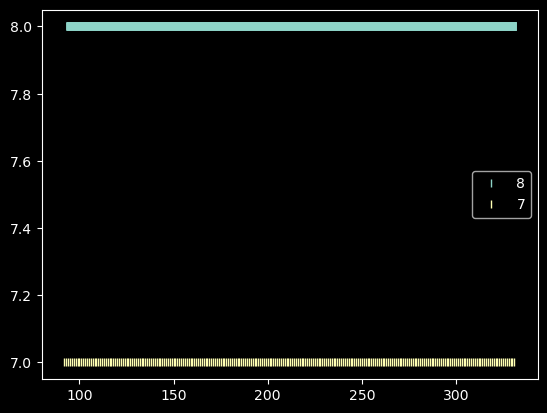

In [30]:
for ch in ([8,7]):
    # plt.xlim(65,75)
    plt.plot(np.array(ni_ts[ch]),
             np.ones(len(ni_ts[ch]))*ch,
             '|',label=ch)
plt.legend()


In [33]:
# Convert the values to float
pellet_detected_frame = [float(frame) for frame in pellet_detected_frame]
pellet_delivery_frame = [float(frame) for frame in pellet_delivery_frame]


In [34]:
stimuli_times = {'pellet_detected_seconds':pellet_detected_seconds,
                'pellet_delivery_seconds':pellet_delivery_seconds,
                'pellet_detected_sideCam_frames':pellet_detected_frame,
                'pellet_delivery_sideCam_frames':pellet_delivery_frame,
                'all_frames_sideCam':frame_numbers,
                'frames_in_seconds_openEphys':frames_in_seconds_open_ephys,

                  }
stimuli_times



{'pellet_detected_seconds': [17.74,
  52.266666666666666,
  86.71333333333334,
  106.13333333333334,
  140.49333333333334,
  175.0,
  209.57333333333332,
  244.13333333333333],
 'pellet_delivery_seconds': [18.133333333333333,
  52.526666666666664,
  86.96,
  106.27333333333333,
  140.75333333333333,
  175.56,
  209.92,
  244.38],
 'pellet_detected_sideCam_frames': [2661.0,
  7840.0,
  13007.0,
  15920.0,
  21074.0,
  26250.0,
  31436.0,
  36620.0],
 'pellet_delivery_sideCam_frames': [2720.0,
  7879.0,
  13044.0,
  15941.0,
  21113.0,
  26334.0,
  31488.0,
  36657.0],
 'all_frames_sideCam': [0.006666666666666667,
  0.013333333333333334,
  0.02,
  0.02666666666666667,
  0.03333333333333333,
  0.04,
  0.04666666666666667,
  0.05333333333333334,
  0.06,
  0.06666666666666667,
  0.07333333333333333,
  0.08,
  0.08666666666666667,
  0.09333333333333334,
  0.1,
  0.10666666666666667,
  0.11333333333333333,
  0.12,
  0.12666666666666668,
  0.13333333333333333,
  0.14,
  0.14666666666666667,
  

### Conver values to floats, for code to work, idk why

In [32]:
# Convert the 'frames' values to float
stimuli_times['all_frames_sideCam'] = [float(frame) for frame in stimuli_times['all_frames_sideCam']]


# Now, the 'frames' values are in float format
print(stimuli_times['all_frames_sideCam'])

NameError: name 'stimuli_times' is not defined

In [329]:
# Convert the 'frames' values to float
stimuli_times['frames_openEphys'] = [float(frame) for frame in stimuli_times['frames_openEphys']]


# Now, the 'frames' values are in float format
print(stimuli_times['frames_openEphys'])

KeyError: 'frames_openEphys'

In [330]:


#stimulus list
stimuli = {'none': None,
           } 

## Assemble NWB

In [331]:
# !pip install pynwb

In [332]:
import pynwb
from hdmf.backends.hdf5.h5_utils import H5DataIO
from hdmf.utils import StrDataset

In [333]:
from datetime import datetime
from dateutil.tz import tzlocal
from pynwb import NWBFile

nwbfile = NWBFile('Reaching Pertibation Task, Christie Lab, University of Colorado Anschutz. Test of reaching pertibation task. checking aligmnet of neural data with video data', 
                  recording_folder, 
                  datetime.now(tzlocal()),
                  experimenter=experimenter,
                  lab='Christie Lab',
                  institution='University of Colorado',
                  experiment_description=experiment_description,
                  session_id=os.path.basename(recording_folder))

add stimulus information

In [334]:
for stim in stimuli_times.keys():
    nwbfile.add_epoch(np.array(stimuli_times[stim])[0], 
                      np.array(stimuli_times[stim])[-1]+3.,
                      [stim])

In [335]:
nwbfile

root pynwb.file.NWBFile at 0x2294068309776
Fields:
  epoch_tags: {
    all_frames_sideCam,
    frames_in_seconds_openEphys,
    pellet_delivery_seconds,
    pellet_delivery_sideCam_frames,
    pellet_detected_seconds,
    pellet_detected_sideCam_frames
  }
  epochs: epochs <class 'pynwb.epoch.TimeIntervals'>
  experiment_description: Chritie Lab, University of Colorado Anschutz. Test of reaching pertibation task. checking aligmnet of neural data with video data
  experimenter: ['grh']
  file_create_date: [datetime.datetime(2024, 1, 6, 16, 10, 32, 488462, tzinfo=tzlocal())]
  identifier: G:\Grant\jason_christie\testing_0032024-01-04_15-18-13_001
  institution: University of Colorado
  lab: Christie Lab
  session_description: Reaching Pertibation Task, Christie Lab, University of Colorado Anschutz. Test of reaching pertibation task. checking aligmnet of neural data with video data
  session_id: testing_0032024-01-04_15-18-13_001
  session_start_time: 2024-01-06 16:10:32.487666-07:00
  timestamps_reference_time: 2024-01-06 16:10:32.487666-07:00

In [336]:
nwbfile.add_trial_column('stimulus', 'the event occuring during this trial')

#optogenetic pertibation
nwbfile.add_trial_column('optogenetics_LED_state', 'whether or not the LED was on or off for this trial. 1=on,0=off. exact opto times are available in optogenetics_states field of NWB')


#arbMatrix and scene flicker
# nwbfile.add_trial_column('stimulus_index', 'index of each trial into a matrix or list of images')

stim_vals = {'optogenetics_LED_state':-1,
       
}

stim = 'pellet_detected_seconds'
for i,trial_start in enumerate(np.array(stimuli_times[stim])):
    nwbfile.add_trial(start_time=trial_start, stop_time=trial_start, stimulus=stim,
                     optogenetics_LED_state=0,
                 

                     )
    

stim = 'pellet_delivery_seconds'
for i,trial_start in enumerate(np.array(stimuli_times[stim])):
    nwbfile.add_trial(start_time=trial_start, stop_time=trial_start, stimulus=stim,
                     optogenetics_LED_state=0,

                     )
    
stim = 'pellet_detected_sideCam_frames'
for i,trial_start in enumerate(np.array(stimuli_times[stim])):
    nwbfile.add_trial(start_time=trial_start,  stop_time=trial_start, stimulus=stim,
                     optogenetics_LED_state=0,

                     )
    
    
stim = 'pellet_delivery_sideCam_frames'
for i,trial_start in enumerate(np.array(stimuli_times[stim])):
    nwbfile.add_trial(start_time=trial_start,  stop_time=trial_start, stimulus=stim,
                     optogenetics_LED_state=0,

                     )
    
    
stim = 'all_frames_sideCam'
for i,trial_start in enumerate(np.array(stimuli_times[stim])):
    nwbfile.add_trial(start_time=trial_start,  stop_time=trial_start, stimulus=stim,
                     optogenetics_LED_state=0,

                     )
    
    
stim = 'frames_in_seconds_openEphys'
for i,trial_start in enumerate(np.array(stimuli_times[stim])):
    nwbfile.add_trial(start_time=trial_start,  stop_time=trial_start, stimulus=stim,
                     optogenetics_LED_state=0,

                     )

# Back up nwb maker

In [337]:
df = nwbfile.trials.to_dataframe()

In [338]:
df

,start_time,stop_time,stimulus,optogenetics_LED_state
id,,,,
0,8.906667,8.906667,pellet_detected_seconds,0
1,43.433333,43.433333,pellet_detected_seconds,0
2,77.880000,77.880000,pellet_detected_seconds,0
3,97.300000,97.300000,pellet_detected_seconds,0
4,131.660000,131.660000,pellet_detected_seconds,0
...,...,...,...,...
72756,237.986667,237.986667,frames_in_seconds_openEphys,0
72757,237.993333,237.993333,frames_in_seconds_openEphys,0
72758,238.000000,238.000000,frames_in_seconds_openEphys,0


In [339]:
filtered_df = df[df['stimulus'] == 'frames_in_seconds_openEphys']
filtered_df

,start_time,stop_time,stimulus,optogenetics_LED_state
id,,,,
37059,0.006667,0.006667,frames_in_seconds_openEphys,0
37060,0.013333,0.013333,frames_in_seconds_openEphys,0
37061,0.020000,0.020000,frames_in_seconds_openEphys,0
37062,0.026667,0.026667,frames_in_seconds_openEphys,0
37063,0.033333,0.033333,frames_in_seconds_openEphys,0
...,...,...,...,...
72756,237.986667,237.986667,frames_in_seconds_openEphys,0
72757,237.993333,237.993333,frames_in_seconds_openEphys,0
72758,238.000000,238.000000,frames_in_seconds_openEphys,0


In [340]:
filtered_df = df[df['stimulus'] == 'all_frames_sideCam']
filtered_df

,start_time,stop_time,stimulus,optogenetics_LED_state
id,,,,
32,0.006667,0.006667,all_frames_sideCam,0
33,0.013333,0.013333,all_frames_sideCam,0
34,0.020000,0.020000,all_frames_sideCam,0
35,0.026667,0.026667,all_frames_sideCam,0
36,0.033333,0.033333,all_frames_sideCam,0
...,...,...,...,...
37054,246.820000,246.820000,all_frames_sideCam,0
37055,246.826667,246.826667,all_frames_sideCam,0
37056,246.833333,246.833333,all_frames_sideCam,0


In [341]:
filtered_df = df[df['stimulus'] == 'pellet_detected_seconds']
filtered_df

,start_time,stop_time,stimulus,optogenetics_LED_state
id,,,,
0,8.906667,8.906667,pellet_detected_seconds,0
1,43.433333,43.433333,pellet_detected_seconds,0
2,77.880000,77.880000,pellet_detected_seconds,0
3,97.300000,97.300000,pellet_detected_seconds,0
4,131.660000,131.660000,pellet_detected_seconds,0
5,166.166667,166.166667,pellet_detected_seconds,0
6,200.740000,200.740000,pellet_detected_seconds,0
7,235.300000,235.300000,pellet_detected_seconds,0


In [342]:
filtered_df = df[df['stimulus'] == 'pellet_delivery_seconds']
filtered_df

,start_time,stop_time,stimulus,optogenetics_LED_state
id,,,,
8,9.300000,9.300000,pellet_delivery_seconds,0
9,43.693333,43.693333,pellet_delivery_seconds,0
10,78.126667,78.126667,pellet_delivery_seconds,0
11,97.440000,97.440000,pellet_delivery_seconds,0
12,131.920000,131.920000,pellet_delivery_seconds,0
13,166.726667,166.726667,pellet_delivery_seconds,0
14,201.086667,201.086667,pellet_delivery_seconds,0
15,235.546667,235.546667,pellet_delivery_seconds,0


## add optogenetics

In [343]:
np.array(opto_off_times).shape[0]

17851

In [344]:
# opto_states = pynwb.epoch.TimeIntervals(
#     name="optogenetics_states",
#     description="intervals for optical fiber, fiber at power = ?? on what system. fiber 470nm, ",
# )

# opto_states.add_column(name="power", description="15mW")
# opto_states.add_column(name="wavelength", description="470nm")

# for i in range(np.array(opto_off_times).shape[0]):
#     opto_states.add_row(start_time=np.array(opto_on_times)[i], stop_time=np.array(opto_off_times)[i], power=1.5, wavelength=565)

# nwbfile.add_time_intervals(opto_states)

### add ephys data
first add electrodes and raw data link

In [345]:
from dlab.nwbtools import df_from_phy, load_phy_template, option234_positions, multi_load_unit_data


In [346]:
recording_folder = r"G:\Grant\jason_christie\testing_0032024-01-04_15-18-13_001\Record Node 107\experiment1\recording1\continuous"

In [347]:
df_units = multi_load_unit_data(recording_folder,probe_depths=probedepths)
df_units.iloc[0]

C:\Users\denmanlab\AppData\Roaming\Python\Python311\site-packages\dlab\nwbtools.py:481: RuntimeWarning:

invalid value encountered in divide



probe                                                               A
unit_id                                                             0
group                                                            good
depth                                                             NaN
xpos                                                              NaN
zpos                                                              NaN
no_spikes                                                           2
KSlabel                                                           mua
KSamplitude                                                       NaN
KScontamination                                                 100.0
template            [[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...
waveform_weights    [[0.0, 0.0], [0.0, 0.0], [0.0, 0.0], [0.0, 0.0...
amplitudes                      [7.174592971801758, 7.45996618270874]
times                          [122.7703852147336, 132.1053049119473]
Name: 0, dtype: obje

# Do not RUN code bellow, Makes random spike times

In [348]:

# Function to generate random spike times
def generate_random_spike_times():
    return np.sort(np.random.uniform(0, 249, 5000))

# Create a new DataFrame to hold the expanded spike times
expanded_spike_times = pd.DataFrame({'times': [generate_random_spike_times() for _ in range(len(df_units))]})

# Now, you can replace the 'spike_times' column in your original DataFrame with the expanded_spike_times
df_units['times'] = expanded_spike_times['times']
df_units.iloc[5].times[50:70]

array([2.6287102 , 2.65221558, 2.66184861, 2.66690588, 2.66809642,
       2.71164387, 2.74144947, 2.81576634, 2.8336106 , 2.93416744,
       2.98140993, 3.10135201, 3.13279528, 3.19659655, 3.40410215,
       3.47650645, 3.57465992, 3.62013059, 3.69601875, 3.69642003])

# Do not RUN code above, Makes random spike times

In [349]:
probes = ['A']
locations = ['M1']
descriptions = ['Neuropixels1.0'] 

In [350]:
device = nwbfile.create_device(name='ChristieLab Rig_2')

for i, probe in enumerate(probes):
    electrode_name = 'probe'+str(i)
    description = descriptions[i]
    location = locations[i]

    electrode_group = nwbfile.create_electrode_group(electrode_name,
                                                     description=description,
                                                     location=location,
                                                     device=device)
    for ch in range(option234_positions.shape[0]):
        nwbfile.add_electrode(x=option234_positions[ch,0],y=0.,z=option234_positions[0,1],imp=0.0,location='none',filtering='high pass 300Hz',group=electrode_group)
    
#     if len(glob.glob(os.path.join(recording_folder,probes[1])+'/*lf.b*')) > 0:
#         ephys_ts = pynwb.ecephys.ElectricalSeries('lfp_probe'+probeids[i],
#                                 data=H5DataIO(data=StrDataset(glob.glob(os.path.join(recording_folder,probes[1])+'/*lf.b*')[0]),    
#                                         link_data=True),
#                                 electrodes = electrode_group,
#                                 starting_time=0,
#                                 rate=2500,
#                                 resolution=0.001,
#                                 comments="V1, depth = 1500um",
#                                 description="V1, depth = 1500um")
#         nwbfile.add_acquisition(ephys_ts)

In [351]:
nwbfile

root pynwb.file.NWBFile at 0x2294068309776
Fields:
  devices: {
    ChristieLab Rig_2 <class 'pynwb.device.Device'>
  }
  electrode_groups: {
    probe0 <class 'pynwb.ecephys.ElectrodeGroup'>
  }
  electrodes: electrodes <class 'hdmf.common.table.DynamicTable'>
  epoch_tags: {
    all_frames_sideCam,
    frames_in_seconds_openEphys,
    pellet_delivery_seconds,
    pellet_delivery_sideCam_frames,
    pellet_detected_seconds,
    pellet_detected_sideCam_frames
  }
  epochs: epochs <class 'pynwb.epoch.TimeIntervals'>
  experiment_description: Chritie Lab, University of Colorado Anschutz. Test of reaching pertibation task. checking aligmnet of neural data with video data
  experimenter: ['grh']
  file_create_date: [datetime.datetime(2024, 1, 6, 16, 10, 32, 488462, tzinfo=tzlocal())]
  identifier: G:\Grant\jason_christie\testing_0032024-01-04_15-18-13_001
  institution: University of Colorado
  lab: Christie Lab
  session_description: Reaching Pertibation Task, Christie Lab, University of Colorado Anschutz. Test of reaching pertibation task. checking aligmnet of neural data with video data
  session_id: testing_0032024-01-04_15-18-13_001
  session_start_time: 2024-01-06 16:10:32.487666-07:00
  timestamps_reference_time: 2024-01-06 16:10:32.487666-07:00
  trials: trials <class 'pynwb.epoch.TimeIntervals'>

In [352]:
# nwbfile.add_unit_column('location', 'the anatomical location of this unit')
# nwbfile.add_unit_column('quality', 'the quality for the inference of this unit')
# nwbfile.add_unit_column('quality_ISIviolations', 'the quality for the inference of this unit')
# nwbfile.add_unit_column('quality_sn', 'the quality for the inference of this unit')
# nwbfile.add_unit_column('quality_distance', 'the quality for the inference of this unit')

nwbfile.add_unit_column('depth', 'the depth of this unit from the pia')
nwbfile.add_unit_column('xpos', 'the x position on probe')
nwbfile.add_unit_column('ypos', 'the y position on probe')
# nwbfile.add_unit_column('template', 'Kilosort template')
nwbfile.add_unit_column('label', 'user label')
nwbfile.add_unit_column('KSlabel', 'Kilosort label')
nwbfile.add_unit_column('KSamplitude', 'Kilosort amplitude')
nwbfile.add_unit_column('KScontamination', 'Kilosort ISI contamination')
nwbfile.add_unit_column('probe', 'probe ID')

labels =np.array(['noise','mua','good'])

for i,unit_row in df_units.iterrows():
    try: lbl = np.argwhere(unit_row.group==labels)[0][0]
    except: lbl=0
    try: klbl = np.argwhere(unit_row.KSlabel==labels)[0][0]
    except: klbl=0
    nwbfile.add_unit(id=int(unit_row.name), 
                     spike_times=unit_row.times,
                    #  electrodes = np.where(unit_row.waveform_weights > 0)[0],
                    #  waveform_mean = unit_row.template,
# #                       quality=0.95
                     depth = unit_row.depth,
                     xpos= unit_row.xpos,
                     ypos= unit_row.zpos,
#                      # template= unit_row.template,
                     label= lbl,
                     KSlabel= klbl,
                     KSamplitude= unit_row.KSamplitude,
                     KScontamination= unit_row.KScontamination,
                     probe= unit_row.probe,
                    )

In [361]:
# nwb_path = r'C://Users//denmanlab//Desktop//eOPN3_33_nwb.nwb'
nwb_path = r"G:/Grant/jason_christie/testing_0032024-01-04_15-18-13_001/testing_0032024-01-04_15-18-13_002"

with pynwb.NWBHDF5IO(nwb_path, 'w') as io:
    io.write(nwbfile)

# Load data

In [354]:
nwb = h5py.File(nwb_path,'r')

In [355]:
nwb

<HDF5 file "testing_0032024-01-04_15-18-13_001" (mode r)>

# browse with NWBwidget

In [356]:
# !pip install nwbwidgets

In [357]:
from pynwb import NWBHDF5IO
from nwbwidgets import nwb2widget

In [358]:
io = NWBHDF5IO(nwb_path, mode='r')
nwb_ = io.read()

nwb2widget(nwb_)

In [277]:
df_stim = nwb_.trials.to_dataframe()
df_opto = nwb_.get_time_intervals('optogenetics_states').to_dataframe()
df_units = nwb_.units.to_dataframe()

KeyError: "'optogenetics_states' not found in intervals of NWBFile 'root'."

In [278]:
optogenetics_LED_state = []
for i,row in df_stim.iterrows():
    if np.min(np.abs(df_opto.start_time.values - row.start_time))<0.1:
        optogenetics_LED_state.extend([1])
    else:
        optogenetics_LED_state.extend([0])
df_stim['optogenetics_LED_state']= optogenetics_LED_state

NameError: name 'df_opto' is not defined

## flash responses 
[no probes in this nwb yet having data issue with my local copy]

In [359]:
import dlab.psth_and_raster as psth
from dlab.generalephys import cleanAxes
df1=df_units
df1

,probe,unit_id,group,depth,xpos,zpos,no_spikes,KSlabel,KSamplitude,KScontamination,template,waveform_weights,amplitudes,times
0,A,0,good,NaN,NaN,NaN,2,mua,NaN,100.0,"[[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...","[[0.0, 0.0], [0.0, 0.0], [0.0, 0.0], [0.0, 0.0...","[7.174592971801758, 7.45996618270874]","[0.041202298230705536, 0.29028681435430703, 0...."
1,A,1,good,NaN,NaN,NaN,34,mua,394.8,2960.0,"[[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...","[[0.0, 0.0], [0.0, 0.0], [0.0, 0.0], [0.0, 0.0...","[14.02578353881836, 19.89349937438965, 17.8768...","[0.010715860963606993, 0.13021298541432513, 0...."
2,A,2,good,NaN,NaN,NaN,25,mua,276.8,0.0,"[[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...","[[0.0, 0.0], [0.0, 0.0], [0.0, 0.0], [0.0, 0.0...","[11.523443222045898, 10.914251327514648, 10.67...","[0.04866285261561709, 0.07433948472682761, 0.1..."
3,A,4,good,NaN,NaN,NaN,5,mua,NaN,100.0,"[[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...","[[0.0, 0.0], [0.0, 0.0], [0.0, 0.0], [0.0, 0.0...","[8.614684104919434, 8.259440422058105, 9.58356...","[0.11596598720868645, 0.14909851466891177, 0.2..."
4,A,5,good,NaN,NaN,NaN,1,mua,NaN,100.0,"[[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...","[[0.0, 0.0], [0.0, 0.0], [0.0, 0.0], [0.0, 0.0...",[10.641691207885742],"[0.008235722477901497, 0.10614823250431116, 0...."
5,A,9,good,NaN,NaN,NaN,2,mua,NaN,100.0,"[[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...","[[0.0, 0.0], [0.0, 0.0], [0.0, 0.0], [0.0, 0.0...","[7.837193965911865, 7.810108661651611]","[0.10431215318201392, 0.10783388997784149, 0.1..."
6,A,13,good,NaN,NaN,NaN,10,mua,NaN,100.0,"[[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...","[[0.0, 0.0], [0.0, 0.0], [0.0, 0.0], [0.0, 0.0...","[9.265396118164062, 9.055936813354492, 8.62029...","[0.005253007351207817, 0.13511908313475018, 0...."
7,A,29,good,NaN,NaN,NaN,4,mua,NaN,100.0,"[[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...","[[0.0, 0.0], [0.0, 0.0], [0.0, 0.0], [0.0, 0.0...","[8.560967445373535, 9.665849685668945, 9.71414...","[0.0003089211566913441, 0.041182768190424546, ..."
8,A,30,good,NaN,NaN,NaN,1,mua,NaN,100.0,"[[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...","[[0.0, 0.0], [0.0, 0.0], [0.0, 0.0], [0.0, 0.0...",[7.320873737335205],"[0.06934116183218375, 0.07600982056520633, 0.0..."
9,A,41,good,NaN,NaN,NaN,2,mua,580.4,100.0,"[[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...","[[0.0, 0.0], [0.0, 0.0], [0.0, 0.0], [0.0, 0.0...","[12.809432983398438, 12.038893699645996]","[0.04874142903488898, 0.060452670227184035, 0...."


In [360]:
df_stim

,start_time,stop_time,stimulus,optogenetics_LED_state
id,,,,
0,8.906667,8.906667,pellet_detected_seconds,0
1,43.433333,43.433333,pellet_detected_seconds,0
2,77.880000,77.880000,pellet_detected_seconds,0
3,97.300000,97.300000,pellet_detected_seconds,0
4,131.660000,131.660000,pellet_detected_seconds,0
...,...,...,...,...
72756,237.986667,237.986667,frames_in_seconds_openEphys,0
72757,237.993333,237.993333,frames_in_seconds_openEphys,0
72758,238.000000,238.000000,frames_in_seconds_openEphys,0


plot one unit
### label==2 "good"
### label==1 "mua"
### label==0 'noise'

In [281]:
df_units[df_units.probe=='A'][df_units.label==2] # these are the "good" labelled units

AttributeError: 'DataFrame' object has no attribute 'label'

In [282]:
df_units[df_units.probe=='B'][df_units.label==2] # these are the "good" labelled units

AttributeError: 'DataFrame' object has no attribute 'label'

In [283]:
df_units[df_units.probe=='C'][df_units.label==2] # these are the "good" labelled units

AttributeError: 'DataFrame' object has no attribute 'label'

# .values[::2]
### is Equal too the brightdark flashes

C:\Users\denmanlab\AppData\Local\Temp\ipykernel_25824\2220107913.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df1 = df_units[df_units.probe=='A'][df_units.label==2]


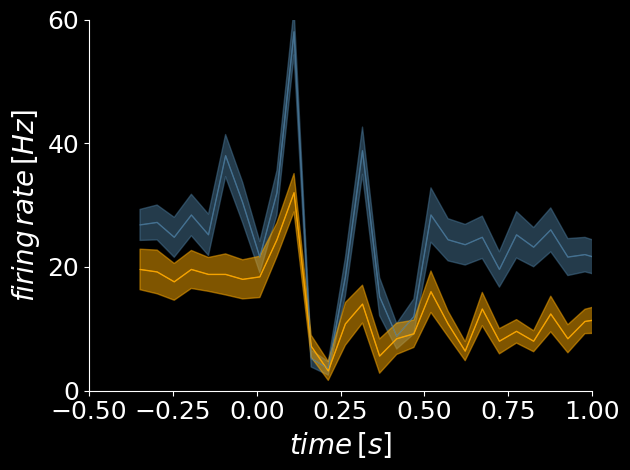

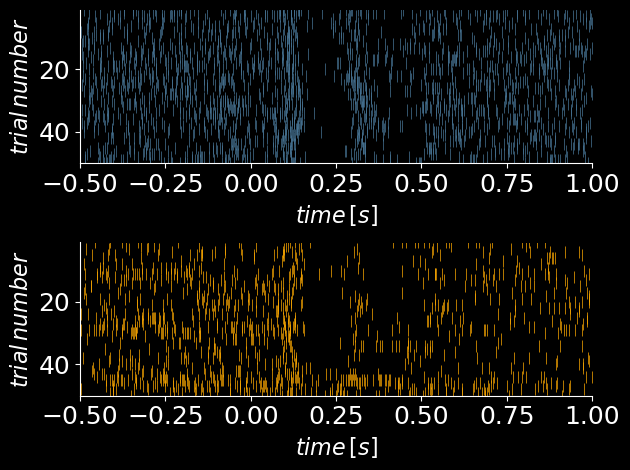

In [168]:
unit=869
df1 = df_units[df_units.probe=='A'][df_units.label==2]
f,ax=plt.subplots(1,1)
psth.psth_line(times=df1[df1.index==unit].spike_times.values[0],
         triggers=df_stim[(df_stim.stimulus=='luminance_flash') & (df_stim.optogenetics_LED_state == 0)].start_time.values[::2],
              ymax=60,binsize=0.05,axes=ax,color='#487697')
psth.psth_line(times=df1[df1.index==unit].spike_times.values[0],
         triggers=df_stim[(df_stim.stimulus=='luminance_flash_opto') ].start_time.values[::2],
              ymax=60,binsize=0.05,axes=ax,color='#ffaa00')
plt.tight_layout()
# f.savefig('/Users/danieljdenman/Academics/grants/applications/20230305_R01_NEI_resub/figures/eArch_LM_psth.eps')
# f.savefig('/Users/danieljdenman/Academics/grants/applications/20230305_R01_NEI_resub/figures/eArch_LM_psth.png')

f,ax=plt.subplots(2,1)
psth.raster(times=df1[df1.index==unit].spike_times.values[0],
         triggers=df_stim[(df_stim.stimulus=='luminance_flash') & (df_stim.optogenetics_LED_state == 0)].start_time.values[::2],
              axes=ax[0],color='#487697',timeDomain=True,post=1.5,ms=8)
psth.raster(times=df1[df1.index==unit].spike_times.values[0],
         triggers=df_stim[(df_stim.stimulus=='luminance_flash_opto') ].start_time.values[::2],
              axes=ax[1],color='#ffaa00',timeDomain=True,post=1.5,ms=8)
for ax_ in ax: ax_.set_xlim(-0.5,1.0)
plt.tight_layout()
# f.savefig('/Users/danieljdenman/Academics/grants/applications/20230305_R01_NEI_resub/figures/eArch_LM_raster.eps')

# .values[1::2]
### is Equal too the dark flashes

C:\Users\denmanlab\AppData\Local\Temp\ipykernel_25824\1463742400.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df1 = df_units[df_units.probe=='A'][df_units.label==2]


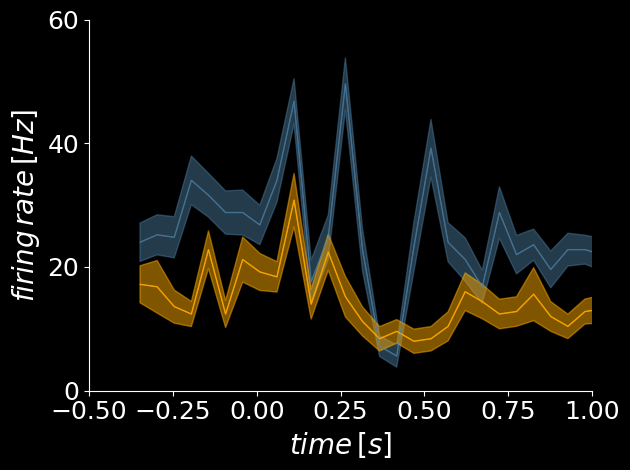

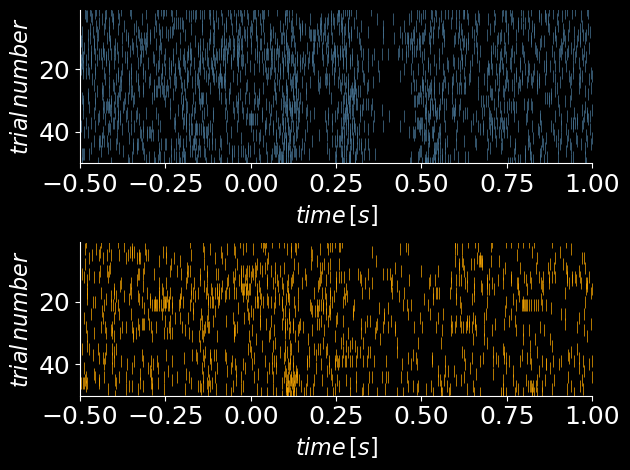

In [146]:
unit=869
df1 = df_units[df_units.probe=='A'][df_units.label==2]
f,ax=plt.subplots(1,1)
psth.psth_line(times=df1[df1.index==unit].spike_times.values[0],
         triggers=df_stim[(df_stim.stimulus=='luminance_flash') & (df_stim.optogenetics_LED_state == 0)].start_time.values[1::2],
              ymax=60,binsize=0.05,axes=ax,color='#487697')
psth.psth_line(times=df1[df1.index==unit].spike_times.values[0],
         triggers=df_stim[(df_stim.stimulus=='luminance_flash_opto') ].start_time.values[1::2],
              ymax=60,binsize=0.05,axes=ax,color='#ffaa00')
plt.tight_layout()
# f.savefig('/Users/danieljdenman/Academics/grants/applications/20230305_R01_NEI_resub/figures/eArch_LM_psth.eps')
# f.savefig('/Users/danieljdenman/Academics/grants/applications/20230305_R01_NEI_resub/figures/eArch_LM_psth.png')

f,ax=plt.subplots(2,1)
psth.raster(times=df1[df1.index==unit].spike_times.values[0],
         triggers=df_stim[(df_stim.stimulus=='luminance_flash') & (df_stim.optogenetics_LED_state == 0)].start_time.values[1::2],
              axes=ax[0],color='#487697',timeDomain=True,post=1.5,ms=8)
psth.raster(times=df1[df1.index==unit].spike_times.values[0],
         triggers=df_stim[(df_stim.stimulus=='luminance_flash_opto') ].start_time.values[1::2],
              axes=ax[1],color='#ffaa00',timeDomain=True,post=1.5,ms=8)
for ax_ in ax: ax_.set_xlim(-0.5,1.0)
plt.tight_layout()
# f.savefig('/Users/danieljdenman/Academics/grants/applications/20230305_R01_NEI_resub/figures/eArch_LM_raster.eps')